# Import Libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler

In [174]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import MeanShift

In [175]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [176]:
allen = pd.read_csv("Dataset.csv")

In [177]:
allen.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [178]:
allen.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [179]:
allen.info

<bound method DataFrame.info of                          Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28

# Preprocessing

In [180]:
allen[allen['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [181]:
allen['Grad.Rate']['Cazenovia College'] = 100

In [182]:
allen[allen['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


# Analysis

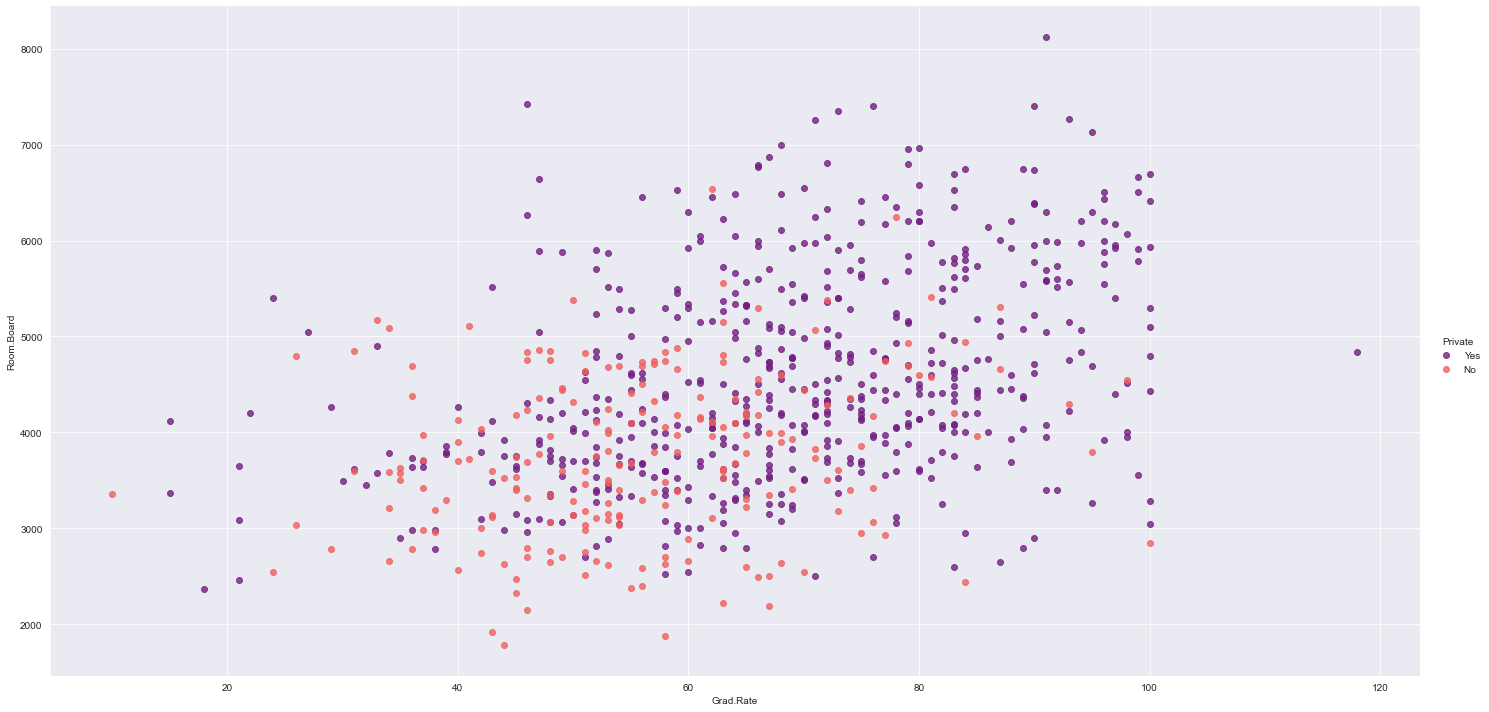

In [183]:
sns.set_style('darkgrid')
sns.lmplot('Grad.Rate','Room.Board',data=allen,hue='Private',
           palette='magma',size=10,aspect=2,fit_reg=False)

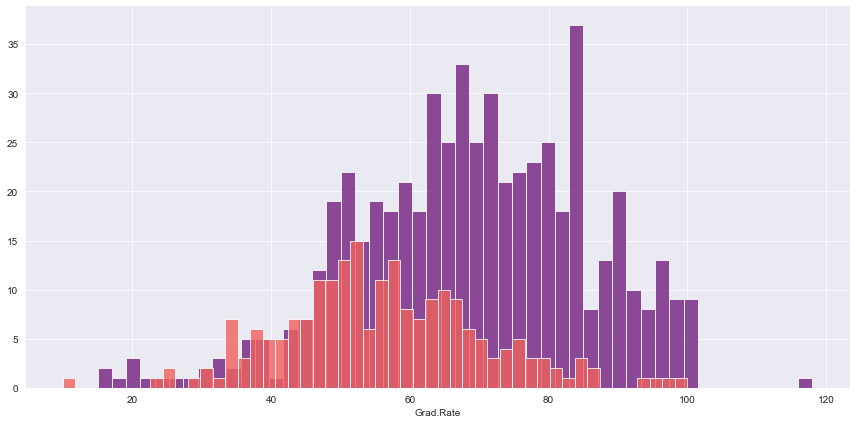

In [184]:
sns.set_style('darkgrid')
g1 = sns.FacetGrid(allen,hue="Private",palette='magma',size=6,aspect=2)
g1 = g1.map(plt.hist,'Grad.Rate',bins=50,alpha=0.8)

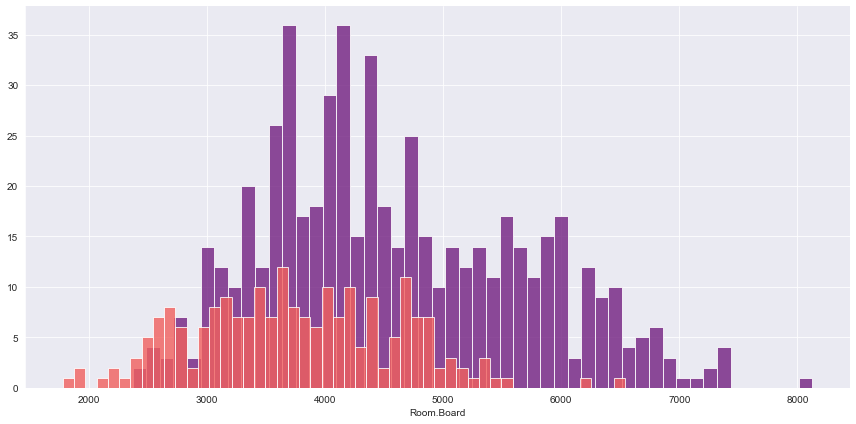

In [185]:
sns.set_style('darkgrid')
g2 = sns.FacetGrid(allen,hue="Private",palette='magma',size=6,aspect=2)
g2 = g2.map(plt.hist,'Room.Board',bins=50,alpha=0.8)

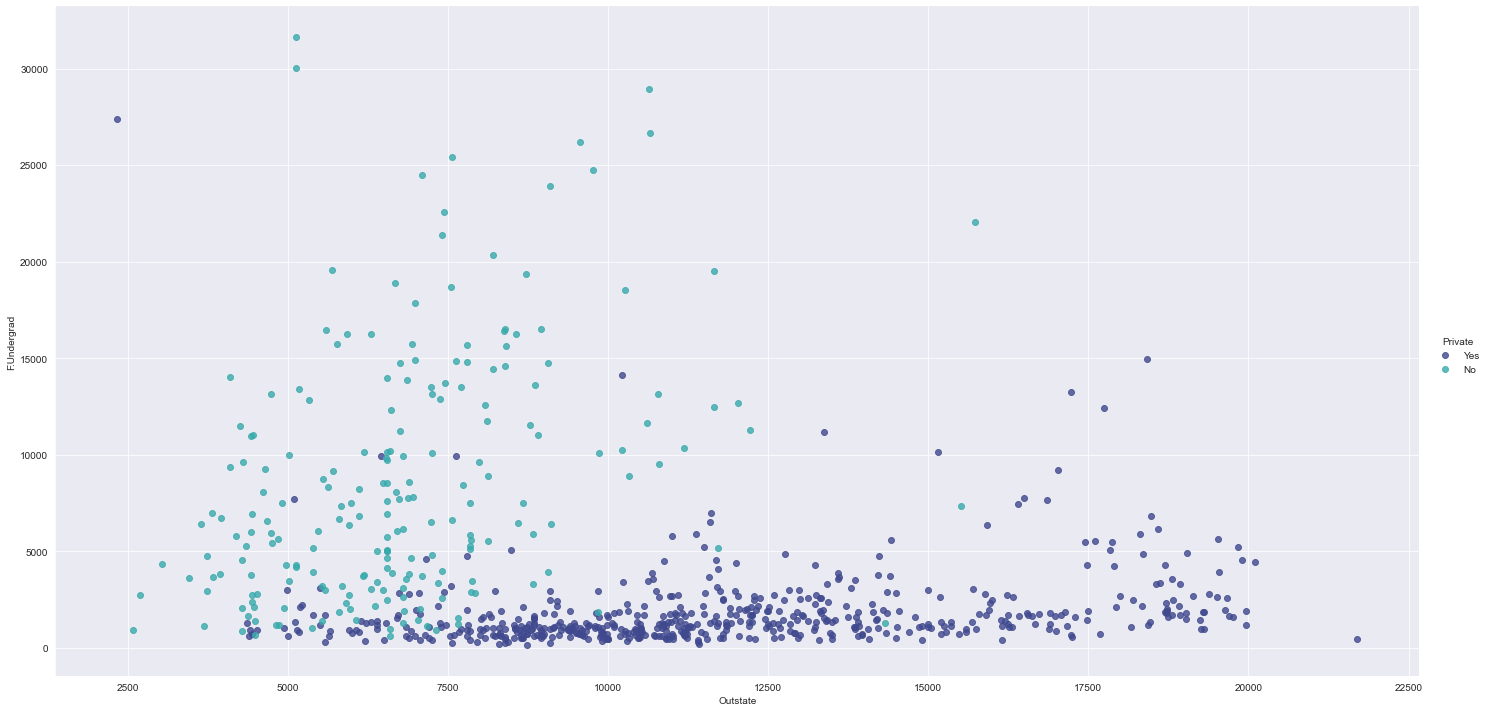

In [186]:
sns.set_style('darkgrid')
sns.lmplot('Outstate','F.Undergrad',data=allen,hue='Private',
           palette='mako',size=10,aspect=2,fit_reg=False)

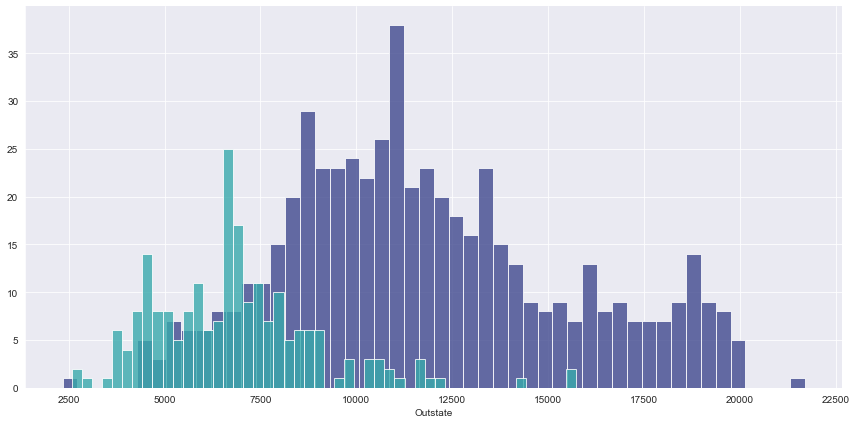

In [187]:
sns.set_style('darkgrid')
g3 = sns.FacetGrid(allen,hue="Private",palette='mako',size=6,aspect=2)
g3 = g3.map(plt.hist,'Outstate',bins=50,alpha=0.8)

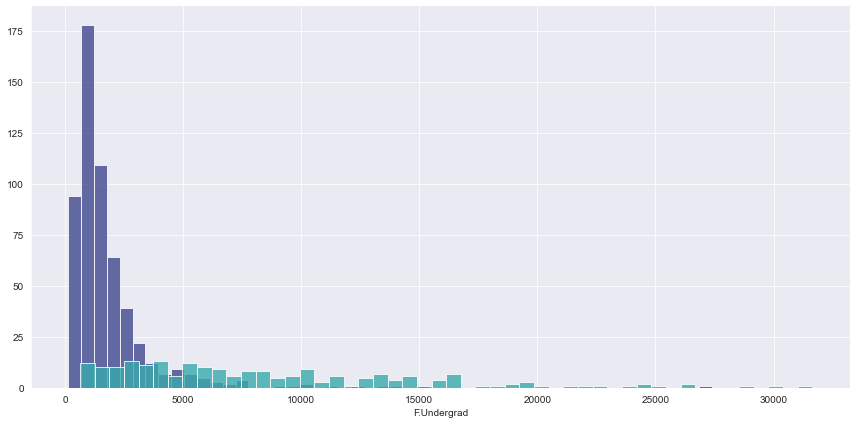

In [188]:
sns.set_style('darkgrid')
g4 = sns.FacetGrid(allen,hue="Private",palette='mako',size=6,aspect=2)
g4 = g4.map(plt.hist,'F.Undergrad',bins=50,alpha=0.8)

In [189]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

# K-Means

In [190]:
model1 = KMeans(n_clusters=2)
model1.fit(allen.drop(["Private", "Unnamed: 0"],axis=1))

KMeans(n_clusters=2)

In [191]:
model1.cluster_centers_


array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [192]:
allen1 = allen
allen1['Cluster'] = allen['Private'].apply(converter)

In [193]:
allen1.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### Confusion Matrix 

In [194]:
print(confusion_matrix(allen1['Cluster'],model1.labels_))

[[138  74]
 [531  34]]


### Classification Report

In [195]:
print(classification_report(allen1['Cluster'],model1.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



### Accuracy

In [196]:
c1 = confusion_matrix(allen1['Cluster'],model1.labels_)
print('Accuracy: {:.2%}'.format((c1[0,0]+c1[1,1])/sum(sum(c1))))

Accuracy: 22.14%


### F1 Score

In [197]:
f11 = f1_score(allen1['Cluster'],model1.labels_)
print('F1 Score: {:.2%}'.format(f11))

F1 Score: 10.10%


### Save

In [206]:
allen11 = pd.DataFrame({'Model':'K-Means',
                      'Accuracy':[(c1[0,0]+c1[1,1])/sum(sum(c1))*100],
                      'F1 Score':[f11*100]})

In [207]:
allen11.head()

,Model,Accuracy,F1 Score
0,K-Means,22.136422,10.104012


# Birch

In [208]:
model2 = Birch(branching_factor = 50, n_clusters = 2, threshold = 1.5)
model2.fit(allen.drop(["Private", "Unnamed: 0"],axis=1))

Birch(n_clusters=2, threshold=1.5)

In [211]:
allen2 = allen
allen2['Cluster'] = allen['Private'].apply(converter)

In [212]:
allen2.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### Confusion Matrix 

In [213]:
print(confusion_matrix(allen2['Cluster'],model2.labels_))

[[ 68 144]
 [554  11]]


### Classification Report

In [215]:
print(classification_report(allen2['Cluster'],model2.labels_))

              precision    recall  f1-score   support

           0       0.11      0.32      0.16       212
           1       0.07      0.02      0.03       565

    accuracy                           0.10       777
   macro avg       0.09      0.17      0.10       777
weighted avg       0.08      0.10      0.07       777



### Accuracy

In [216]:
c2 = confusion_matrix(allen2['Cluster'],model2.labels_)
print('Accuracy: {:.2%}'.format((c2[0,0]+c2[1,1])/sum(sum(c2))))

Accuracy: 10.17%


### F1 Score

In [217]:
f12 = f1_score(allen2['Cluster'],model2.labels_)
print('F1 Score: {:.2%}'.format(f12))

F1 Score: 3.06%


### Save

In [219]:
allen12 = pd.DataFrame({'Model':'Birch',
                      'Accuracy':[(c2[0,0]+c2[1,1])/sum(sum(c2))*100],
                      'F1 Score':[f12*100]})

In [220]:
allen12.head()

,Model,Accuracy,F1 Score
0,Birch,10.16731,3.055556


# DBSCAN

In [68]:
model3 = GaussianNB()
model3.fit(xtrain,ytrain)
p3 = model3.predict(xtest)

### Confusion Matrix

In [69]:
print(confusion_matrix(ytest,p3))

[[38  0]
 [ 6 16]]


### Accuracy

In [71]:
c3 = confusion_matrix(ytest,p3)
print('Accuracy: {:.2%}'.format((c3[0,0]+c3[1,1])/sum(sum(c3))))

Accuracy: 90.00%


### F1 Score

In [72]:
f13 = f1_score(ytest,p3)
print('F1 Score: {:.2%}'.format(f13))

F1 Score: 84.21%


### Save

In [ ]:
allen13 = pd.DataFrame({'Model':'DBScan',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen13.head()

# FeatureAgglomeration

In [73]:
model4 = KNeighborsClassifier()
model4.fit(xtrain,ytrain)
p4 = model4.predict(xtest)

### Confusion Matrix

In [74]:
print(confusion_matrix(ytest,p4))

[[36  2]
 [10 12]]


### Accuracy

In [76]:
c4 = confusion_matrix(ytest,p4)
print('Accuracy: {:.2%}'.format((c4[0,0]+c4[1,1])/sum(sum(c4))))

Accuracy: 80.00%


### F1 Score

In [77]:
f14 = f1_score(ytest,p4)
print('F1 Score: {:.2%}'.format(f14))

F1 Score: 66.67%


### Save

In [ ]:
allen14 = pd.DataFrame({'Model':'Feature Agglomeration',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen14.head()

# MeanShift

In [78]:
model5 = LogisticRegression()
model5.fit(xtrain,ytrain)
p5 = model5.predict(xtest)

### Confusion Matrix

In [79]:
print(confusion_matrix(ytest,p5))

[[38  0]
 [22  0]]


### Accuracy

In [81]:
c5 = confusion_matrix(ytest,p5)
print('Accuracy: {:.2%}'.format((c5[0,0]+c5[1,1])/sum(sum(c5))))

Accuracy: 63.33%


### F1 Score

In [82]:
f15 = f1_score(ytest,p5)
print('F1 Score: {:.2%}'.format(f15))

F1 Score: 0.00%


### Save

In [182]:
allen15 = pd.DataFrame({'Model':'Mean Shift',
                      'Accuracy':[acc],
                      'F1 Score':[f1s]})

In [ ]:
allen15.head()

# Concat

In [183]:
al = pd.concat([allen11,allen12,allen13,allen14,allen15],axis=0).reset_index()
al = al.drop('index',axis=1)
al

,Model,Accuracy,Precision,F1 Score
0,Random Forest,0.882353,0.812629,0.851371
1,Decision Tree,0.876471,0.850546,0.836372
2,Naive Bayes,0.876471,0.857514,0.816352
3,K-Nearest Neighbour,0.805882,0.798139,0.689109
4,Logistic Regression,0.644118,NA,0.000000
